# PurpleAir TimeSeries

This notebook creates line plots for PurpleAir data in order to better help understand the trends present.

In [1]:
import pandas as pd

import plotly.express as px
import plotly.graph_objects as go


import sys
sys.path.append('../')   # Add parent directory of src to allow it to be imported
import src.visualization.visualize as pplot   # Custom class to store useful functions

## Import Preprocessed Data
First, we import the data that has been cleaned of outliers and is on a daily frequency. Then, we resample to a weekly frequency.

In [12]:
data = pd.read_parquet('../data/processed/PurpleAir_daily.parquet')[['Channel A PM2.5 (ug/m3)']]
data = pplot.resample_by_sensor(data,fq='W')

## Facet Grid Line Plots

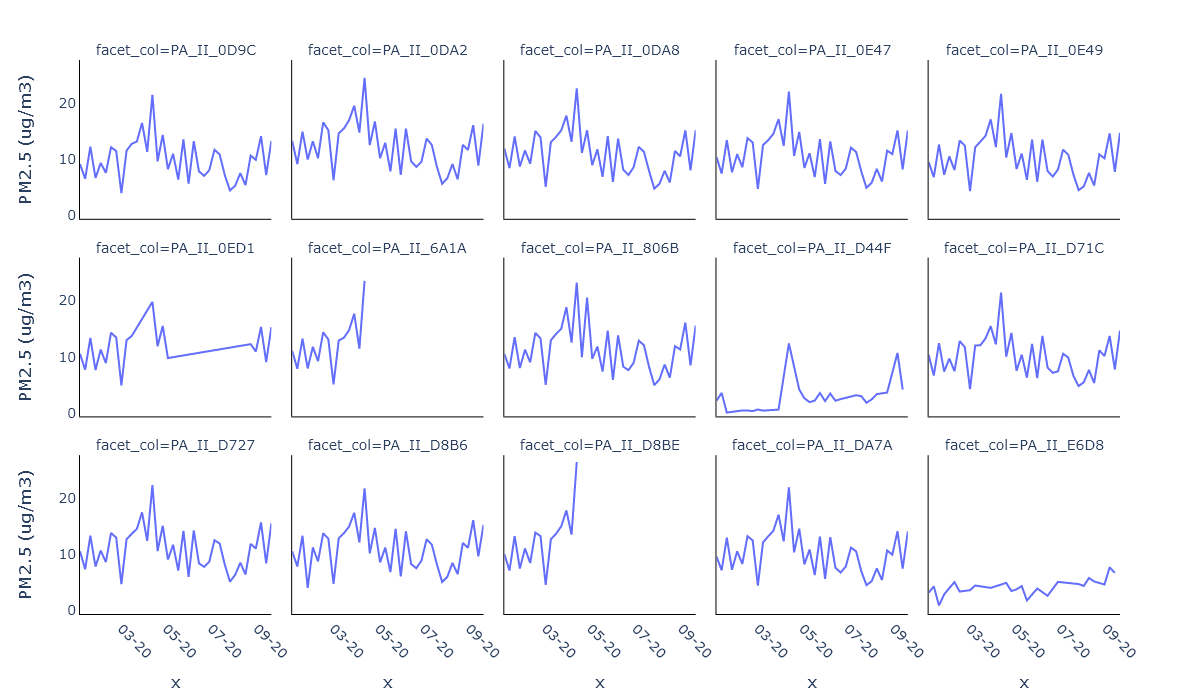

In [12]:
labels = {'created_at':'','Channel A PM2.5 (ug/m3)':'PM2.5 (ug/m3)'}
fig = px.line(data, x=data.index.get_level_values('created_at'), y="Channel A PM2.5 (ug/m3)",
              facet_col=data.index.get_level_values('sensor_name'), facet_col_wrap=5,
              labels=labels, width=1200, height=700)

fig = pplot.update_layout(fig, fontsize=14, nticks=8)
fig.show("png",width=1200, height=700)

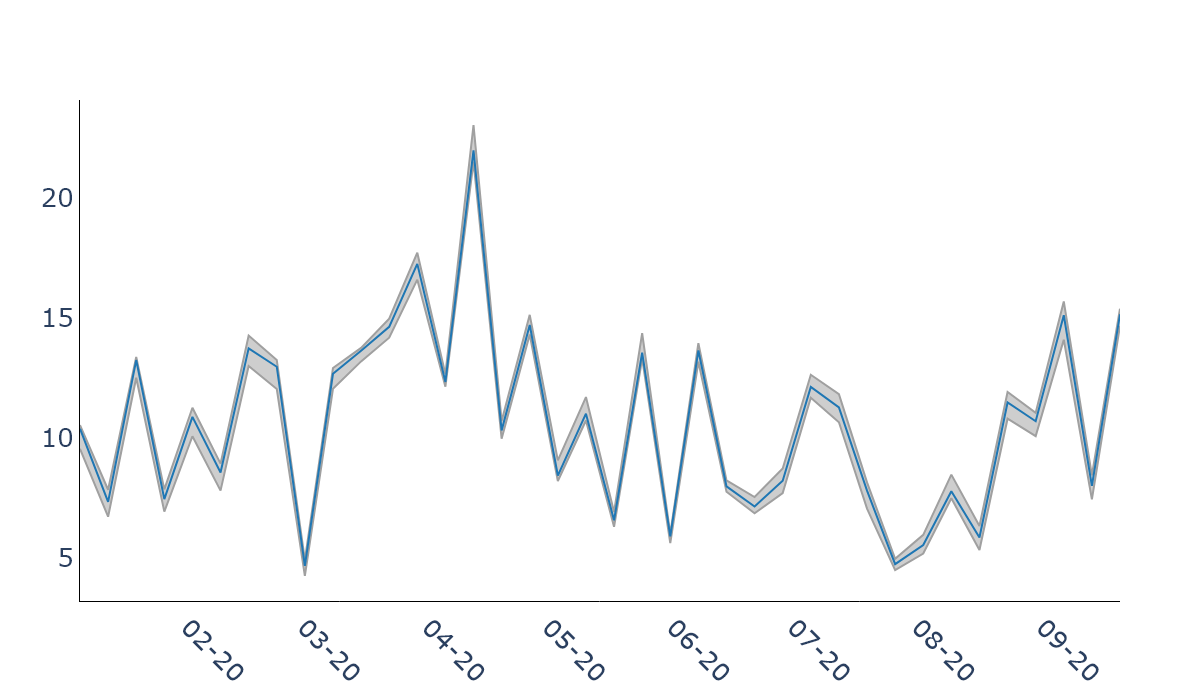

In [21]:
data_by_time = data.groupby([pd.Grouper(level='created_at')])

data_b = data.groupby([pd.Grouper(level='created_at')]).quantile(.50)
data_b['upper']=data.groupby([pd.Grouper(level='created_at')]).quantile(.75)
data_b['lower']=data.groupby([pd.Grouper(level='created_at')]).quantile(.25)

fig=go.Figure()
blue='#1f77b4'
gray='#A0A0A0'

fig.add_trace(go.Scatter(
    x=data_b.index.get_level_values('created_at'),
    y=data_b['lower'],
    fill=None,
    mode='lines',
    name='area',
    line_color=gray
))

fig.add_trace(go.Scatter(
    x=data_b.index.get_level_values('created_at'),
    y=data_b['upper'],
    fill='tonexty',
    line_color=gray
))

fig.add_trace(go.Scatter(
    x=data_b.index.get_level_values('created_at'),
    y=data_b['Channel A PM2.5 (ug/m3)'],
    name='area',
    line_color=blue
))

fig.update_layout(
    showlegend=False
)

fig = pplot.update_layout(fig, fontsize=26, nticks=10)

fig.update_traces(mode='lines')
fig.show('png',width=1200, height=700)



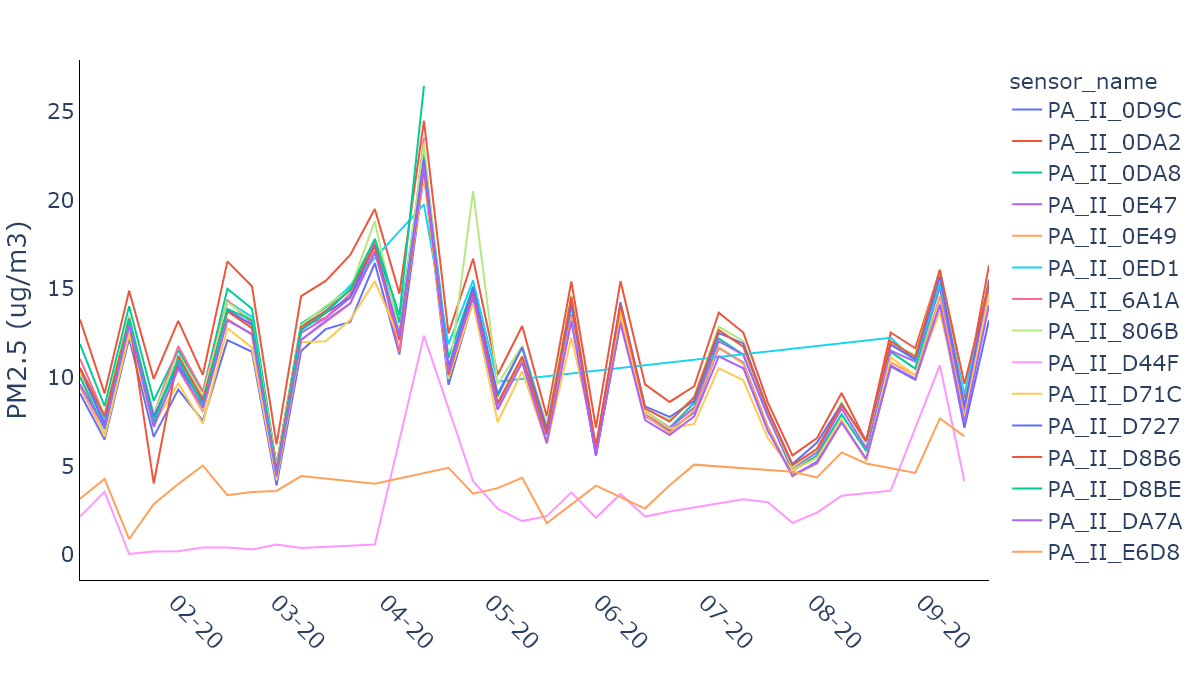

In [13]:
labels = {'created_at':'','Channel A PM2.5 (ug/m3)':'PM2.5 (ug/m3)'}
data2=data

fig = px.line(data.reset_index(), x="created_at",y='Channel A PM2.5 (ug/m3)',line_group='sensor_name',color='sensor_name',labels=labels, width=1200, height=700)
fig = pplot.update_layout(fig, fontsize=22, nticks=16)

fig.show("png",width=1200, height=700)